## Week 9 Overview
This week we will dive into vectors, one of the simplest concepts in linear algebra, yet an important foundation for everything else. From a mathematical perspective, vectors can represent locations and directions and can be used to define many higher level concepts. From a data science perspective, vectors can represent raw data or highly refined summaries of data. We will cover a variety of these uses this week.

### Learning Objectives
At the end of this week, you should be able to:
- Recognize and describe vectors including magnitude and direction
- Implement basic vector/scalar and vector/vector operations such as addition and multiplication
- Recognize problems including linear regression that can be formulated as vector multiplication problems 
- Recognize common vector similarity measures
- Calculate common vector similarity measures

## Topic: Basic Vector Concepts:
A vector is simply an ordered list of numbers. Much of linear algebra involves manipulation of vectors, or matrices composed of vectors. Many of these manipulations are abstract—just number manipulation from one point of view —but if we assign meaning to these numbers at the beginning of the process, we can derive meaning and understanding from the numbers at the end of the process. Last week, we briefly introduced various vector notation and terminology. This week, we will cover how to use it and connect it back to its use in data science.
### Learning Objectives
- Recognize and describe vectors including magnitude and direction
- Implement basic vector/scalar and vector/vector operations such as addition and multiplication

### 9.1  Lesson: Vector Notation and Basic Concepts

### Vector Notation Recap
Let's quickly review the basic vector notations.

#### Definition: vector
A vector is an ordered list of numbers with a fixed dimension.

The dimension of the vector means the number of, or total amount of, numbers in the vector. For example, a vector with 10 numbers has a fixed dimension, 10. A vector might represent a position, direction, or some abstract features.

#### Example: column vector element references
$$
a = \begin{bmatrix}
a_0\\
a_1\\
a_2
\end{bmatrix}
$$

#### Example: row vector element references
$$
a = \begin{bmatrix}
a_0 & a_1 & a_2
\end{bmatrix}
$$

#### Magnitude and Directions
One of the main interpretations of vectors is a magnitude and direction

#### Definition: Magnitude of a vector
The magnitude of vector **v** denoted $\|\mathbf{v}\|$ is $\sqrt{\sum v_i^2}$,

If you think of the vectors as positions in space, the magnitude is the Euclidean distance from the origin, the vector of all zeros. The magnitude of a vector is also sometimes called the length or norm of the vector. 

The notation **|v|** is also used occasionally for the magnitude. Strictly speaking, that is the absolute value, or scalar norm, so $\|v\|$ is more correct for vectors.

#### Definition: Unit Vector
A unit vector is a vector with magnitude 1

If you divide each element of a vector by the vector's magnitude, you get a unit vector in the same direction. Unit vectors are a common way to represent vector directions and work for any dimension vector. 

### Vectors as Positions vs. Magnitudes and Directions
This video looks as the complementary uses of vectors to represent positions as well as magnitudes and directions. 

In [2]:
import numpy as np
vector = np.array([[3], [4]])
vector

array([[3],
       [4]])

What does a vector represent? Most machine learning algorithms treat a vector as an abstract set of numbers with useful smoothness properties that we don't neccesarily know yet. 

Two more interpretations that linear algebra leans into:a vector represents a position or magnitude and direction, in some multidimensional space of interest. Again it's not assuming an interpretation of the space, rather that the space has some meaning that we might care about.

When interpreting a vector as a position, each element of the vector is a coordinate, which is pretty simple. 

#### Linear Algebra leans towards magnitudes and directions
- operating on positions gives magnitudes and directions
- operating on magnitudes and directions gives... more magnitudes and directions
- Linear algebra will happily operate on any set of numbers in the same way, regardless of the semantics. 

#### Polar Coordinates for Direction and Magnitude: 
For two-dimensional vectors, we can divide them into magnitude and direction using polar coordinates.
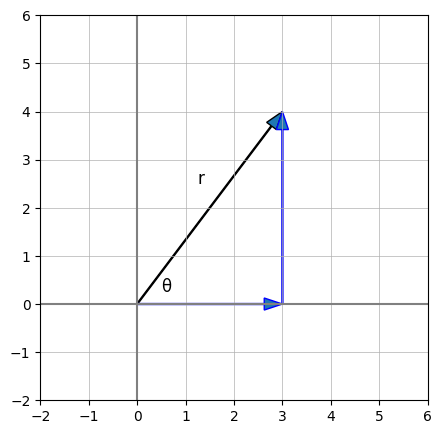
Figure 1: Decomposing a Vector into x and y Components, and Radius and Angle

$$(r, \theta) \leftrightarrow (r \cos \theta, r \sin \theta) = (x, y)$$

But this does not scale cleanly to multiple dimensions. Using latittude and longitude as one example. 

$$ x = r \cos \theta_{latt} \cos\theta_{long}$$
$$ y = r\cos\theta_{latt} \sin\theta_{long}$$
$$ z = r\sin\theta_{latt}$$

Schemes like this have individual formulas scaling linearly according to the number of dimensions, and the total length scales quadratically according to the number of dimensions. Meanwhile, the magnitude and unit vector approach in the next section has total length linearly in the number of dimensions.

#### Splitting Vectors Into Magnitudes and Directions
A more scalable approach to splitting vectors into magnitudes and directions is to use unit vectors. As mentioned previously, if you divide a vector element-wise by its magnitude, you get a unit vector in the same direction.

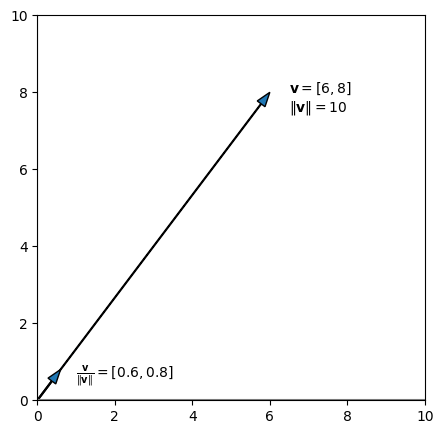
Figure 2: A vector and its unit vector, along with their magnitudes.

(6,8) => (0.6, 0.8)

The figure above shows the vector $\mathbf{v} = [6, 8]$ broken up into a magnitude $\|\mathbf{v}\| = 10$ and unit vector $\mathbf{d} = [0.6, 0.8]$. Here is the calculation.

$$
\|\mathbf{v}\| = \sqrt{6^2 + 8^2}
= \sqrt{100}
= 10
$$

$$
\mathbf{d} = \frac{\mathbf{v}}{\|\mathbf{v}\|}
= [0.6, 0.8]
$$

$$
\|\mathbf{d}\| = \sqrt{0.6^2 + 0.8^2}
= \sqrt{1}
= 1
$$

All vectors in the same direction will produce the same unit vector.

#### Vector Addition
Vector addition is usually adding two vectors element-wise. Adding vectors and scalars together is uncommon in linear algebra, but it may happen when evaluating linear functions many times at once.

#### Addition of two vectors
When adding two vectors, the inputs should have the same dimension, and each output element will be the sum of the corresponding input elements.
$$
\begin{bmatrix}
a_0\\
a_1\\
\dots\\
a_{n-1}
\end{bmatrix}
+
\begin{bmatrix}
b_0\\
b_1\\
\dots\\
b_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
a_0 + b_0\\
a_1 + b_1\\
\dots\\
a_{n-1} + b_{n-1}
\end{bmatrix}
$$ 

Adding row vectors behaves similarly.

$$
\begin{bmatrix}
a_0\\
a_1\\
\dots\\
a_{n-1}
\end{bmatrix}
+
b_0
=
\begin{bmatrix}
a_0 + b_0\\
a_1 + b_1\\
\dots\\
a_{n-1} + b_{n-1}
\end{bmatrix}
$$ 

#### Adding a vector and a scalar
$$
\begin{bmatrix}
a_0\\
a_1\\
\dots\\
a_{n-1}
\end{bmatrix}
+
b_0
=
\begin{bmatrix}
a_0 + b_0\\
a_1 + b_1\\
\dots\\
a_{n-1} + b_{n-1}
\end{bmatrix}
$$ 

$$
a_0 
= 
\begin{bmatrix}
b_0\\
b_1\\
\dots\\
b_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
a_0 + b_0\\
a_1 + b_1\\
\dots\\
a_{n-1} + b_{n-1}
\end{bmatrix}
$$

Again, adding a row vector and a scalar behaves similarly.

#### Vector Multiplication
In contrast to vector addition, multiplying vectors by a scalar is much more common. For linear algebra in particular, matrix row operations will repeatedly use vector scalar multiplication. Multiplying vectors element-wise is less common as an operation of interest, but it can be considered an intermediate step of dot products and matrix multiplication.

$$
\begin{bmatrix}
a_0\\
a_1\\
\dots\\
a_{n-1}
\end{bmatrix}
\cdot
b_0
=
\begin{bmatrix}
a_0 + b_0\\
a_1 + b_1\\
\dots\\
a_{n-1} + b_{n-1}
\end{bmatrix}
$$

$$
a_0 
\cdot
\begin{bmatrix}
b_0\\
b_1\\
\dots\\
b_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
a_0 + b_0\\
a_1 + b_1\\
\dots\\
a_{n-1} + b_{n-1}
\end{bmatrix}
$$

Again, adding a row vector and a scalar behaves similarly.

#### Multiplication of two vectors
Multiplication of two vectors element-wise to produce another vector does not even have a common notation for it; the use of $\cdot$ and $\times$ with vectors denotes dot products and matrix multiplication. However, it is pretty common in other contexts such as spreadsheets.

Element-wise multiplication could be considered a logical component of the dot product or matrix multiplication covered below, but it would be immediately summed up and discarded, so element-wise multiplication is not used in practice. Data science and statistics have more applications where vectors might be multiplied; weighted computations and Bayesian statistics are a couple of examples. Multiplying two vectors element-wise works similarly to adding two vectors element-wise. The inputs should have the same dimension, and each output element is the product of the corresponding input elements.

### CS 132 Lecture Notes: Vector Equations
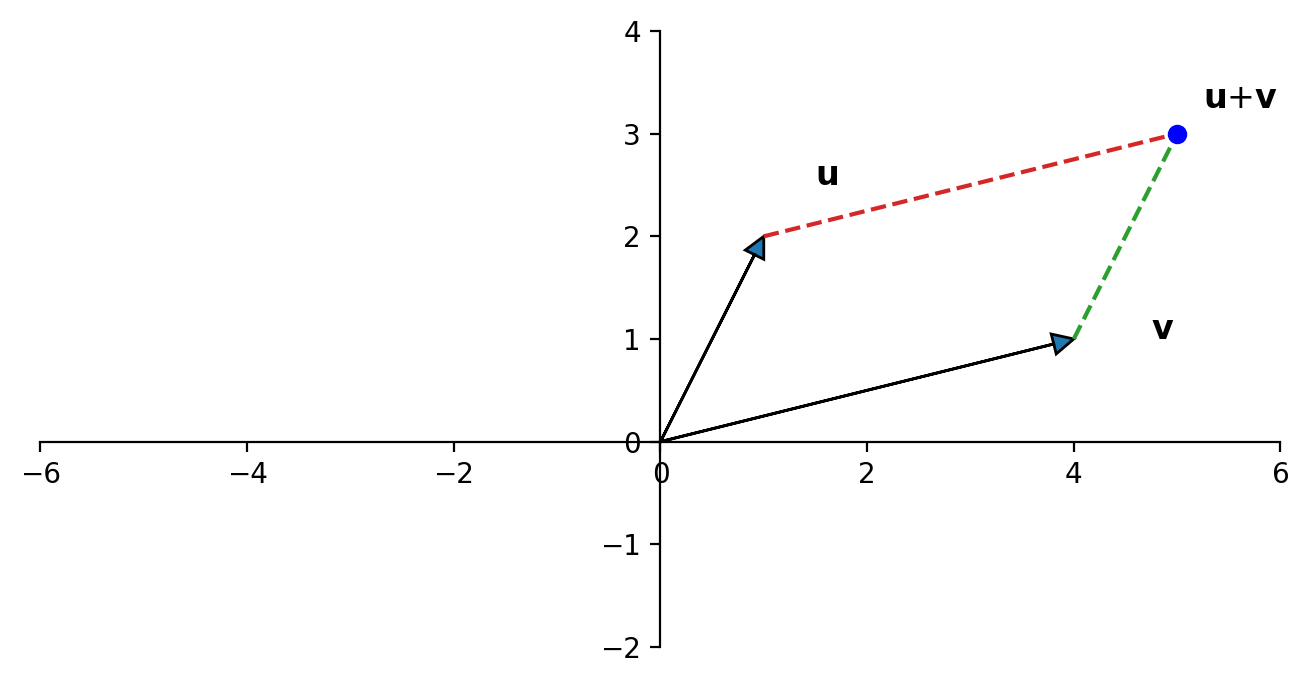

#### Vectors:
We're going to expand our view of what a linear system can represent. Instead of thinking of it as a collection of equations, we are going to think about it as a **single** equation. This is a major shift in perspective that will open up an entirely new way o fthinking about matrices. 

To make this fundamental shift, we need to introduce the idea of a **vector**.

A matrix with only one column is called a **column vector** or simply a **vector**. 

here are some examples

In [6]:
u = np.array([[3], [1]])
v = np.array([[.2], [.3]])
u

array([[3],
       [1]])

In [7]:
v

array([[0.2],
       [0.3]])

We will use the term **scalar** to refer to ordinary numbers (not vectors).
The numbers within the vector are called **components**. 
Because each of these vectors has two components, we say these vectors are in $\mathbb{R}^2$

There is an important poitn here: When we write $\mathbb{R}^n$, we mean that **all vectors that have exactly** $n$ **components**.

Here are some vectors in $\mathbb{R}^3$:
$$
u =
\begin{bmatrix}
2\\
3\\
4\\
\end{bmatrix}
v =
\begin{bmatrix}
-1\\
0\\
2\\
\end{bmatrix}
w = 
\begin{bmatrix}
w_1\\
w_2\\
w_3
\end{bmatrix}
$$ 

### Vectors are Fundamental Objects
We are going to define operations over vectors, so that we can write equations in terms of vectors. In particular, we now define how to compare vectors, add vectors, and multiply vectors **by a scalar**.

First: Two vectors are equal if and only if their corresponding entries are equal.

Thus $\begin{bmatrix}7\\4\end{bmatrix}$ and $\begin{bmatrix}4\\7\end{bmatrix}$ are **not** equal.

**Next**: Multiplying a vector by a scalar is accomplished by multiplying each entry by the scalar. 

For  example:
$$
3
\begin{bmatrix}
1\\
-2
\end{bmatrix}
=
\begin{bmatrix}
3\\
6
\end{bmatrix}
$$


**And finally**: The sum of two vectors is the vector whose entries are the corresponding sums. 

For example:
$$ \begin{bmatrix}1\\-2\end{bmatrix} + \begin{bmatrix}2\\5\end{bmatrix} = \begin{bmatrix} 1 + 2\\-2+5 \end{bmatrix} = \begin{bmatrix}3\\3\end{bmatrix}\cdot$$

Note that **vectors of different sizes cannot be compared or added**.

For example, if **u** $\in \mathbb{R}^2$ & **v** $\in \mathbb{R}^3$:
- we cannot ask whether **u = v**, and 
- **u + v** is undefined.
So with these 3 definitions, we have all the tools to write equations using vectors.

For example, if **u** = $\begin{bmatrix}1\\2\end{bmatrix}$ and **v** = $\begin{bmatrix}2\\5\end{bmatrix}$ then:
$$
4u - 3v = \begin{bmatrix}-2\\7\end{bmatrix}
$$

### Vectors Correspond to Points 
As already noted, an ordered sequence of numbers can be thought of as a point in $n$-dimensional space.

Hence, a vector like $\begin{bmatrix}-2\\-1\end{bmatrix}$ can be thought of as a point on the plane. We will sometimes write vectors as a list, like this (-2,-1). (Which lists the vector components from top to bottom). 

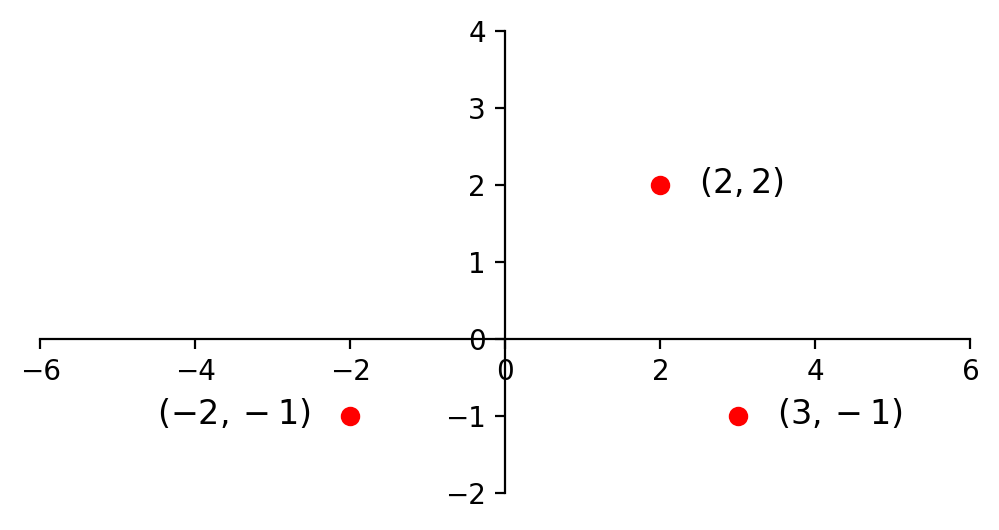

Sometimes we draw an arrow from the origin to the point. 

This style comes from physics, but it can be ahelpful visualization in any case. 

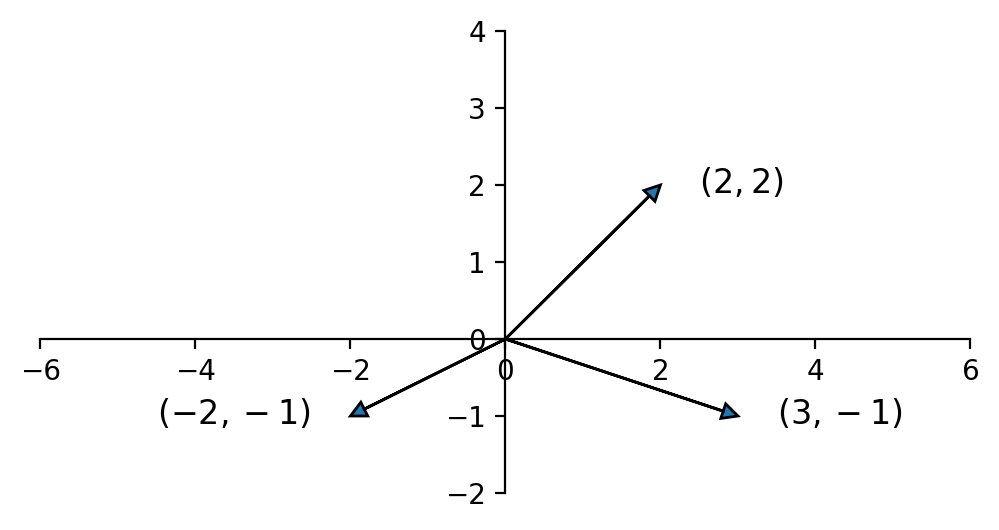

### Vector Addition, Geometrically
A geometric interpretation of a vector sum is as a **parallelogram**

If **u** and **v** in $\mathbb{R}^2$ are represented in the plane, then **u+v** corresponds to the fourth vertex of the parallelogram whose other vertices are **u**, 0, and **v**. 

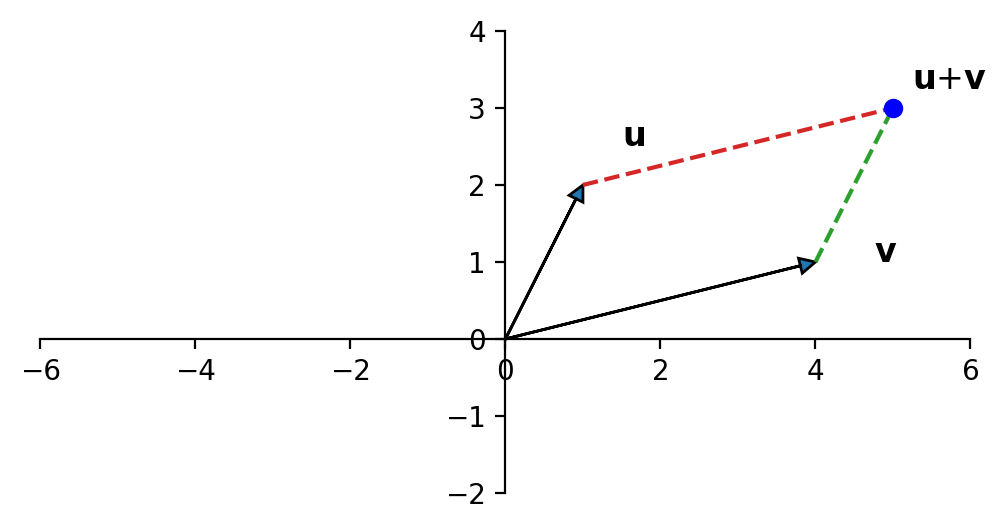

This should be clear from the definition of vector addition (i.e., addition of corresponding elements).

### Vector Scaling, Geometrically
For a given vector **v** and a scalar $a$, multiplying $a$ and **v** corresponds to *lengthening* **v** by a *factor of* $a$.

so **2v** is twice as long as **v**. 

Multiplying by a negative value reverse the "direction" of **v**. 

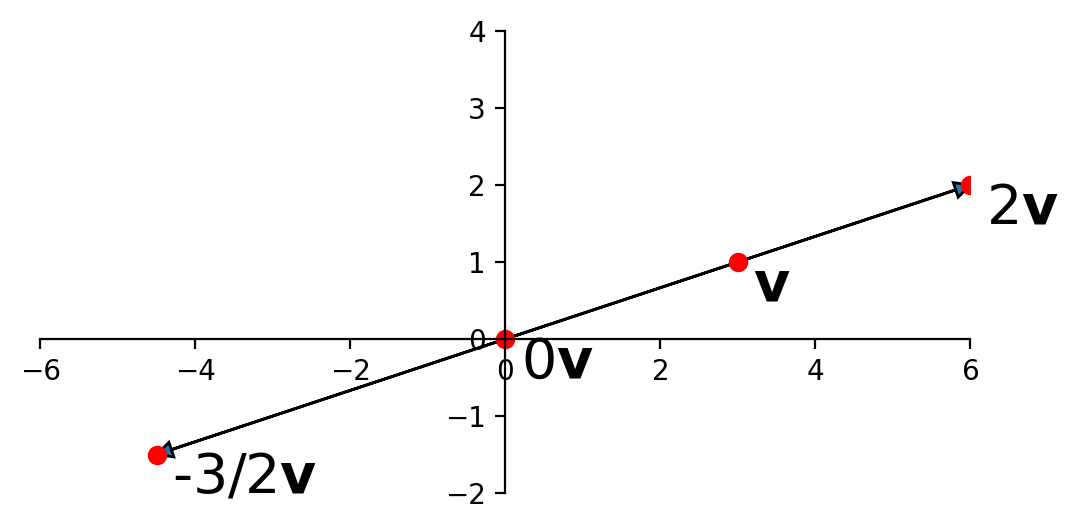

Multiplying a 3d vector by a scalar 

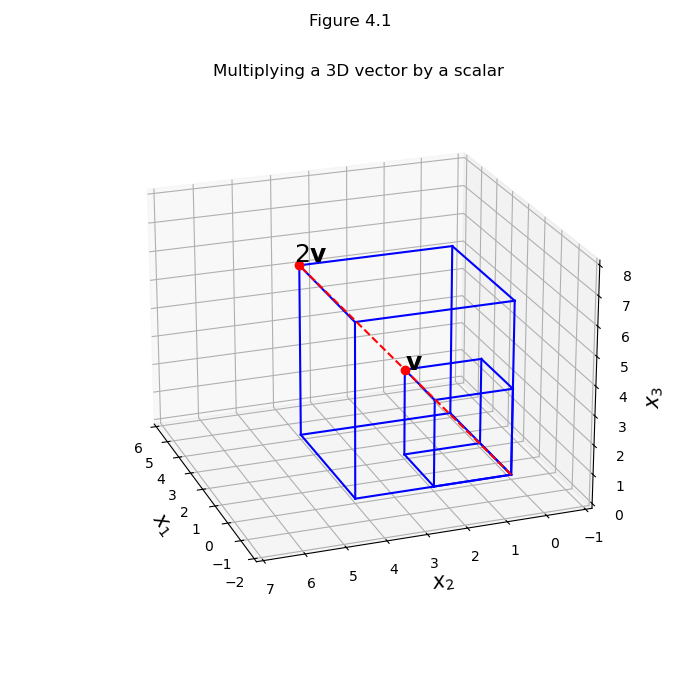

### The algebra of $\mathbb{R}^n$
We’ve defined a new object (the vector), and it has certain algebraic properties.
1. **u** + **v** = **v** + **u**
2. (u + v) + w = u + (v + w)
3. u + 0 = 0 + u = u
4. U + (-u) = -u + u = 0
5. $c$(u + v) = $c$u + $c$v
6. ($c+d$)u = $c$u + $c$v
7. $c$($d$u) = ($cd$)u
8. 1u = u

You can verify each of these by from the definitions of vector addition and scalar-vector multiplication.

### Linear Combinations
A fundamental thing we will do is construct **Linear combinations** of vectors:
$$
y = c_1v_1+\dots+c_pv_p
$$

The $c_i$ values are called **weights**. Weights can be any real number, including zero. So some examples of linear combinations of **v**$_1$ and **v**$_2$ are:
$$
\sqrt{3}v_1 + v_2,
$$

$$
\frac{1}{2}v_1(=\frac{1}{2}v_1 + 0v_2)
$$

and

$$
0 (=0v_1 + 0v_2)
$$

### A fundamental Question
We are now going to take up a very basic question that will lead us to a deeper understanding of linear systems

>Given some set of vectors ${\bf a_1, a_2, ..., a_k}$, can a given vector $\bf b$ be written as a linear combination of ${\bf a_1, a_2, ..., a_k}$?

Let's take a specific example.

Let ${\bf a_1} = \left[\begin{array}{c}1\\-2\\-5\end{array}\right], {\bf a_2} = \left[\begin{array}{c}2\\5\\6\end{array}\right],$ and ${\bf b} = \left[\begin{array}{c}7\\4\\-3\end{array}\right]$.

We need to determine whether ${\bf b}$ can be generated as a linear combination of ${\bf a_1}$ and ${\bf a_2}$.  That is, we seek to find whether weights $x_1$ and $x_2$ exist such that

$$ x_1{\bf a_1} + x_2{\bf a_2} = {\bf b}.$$

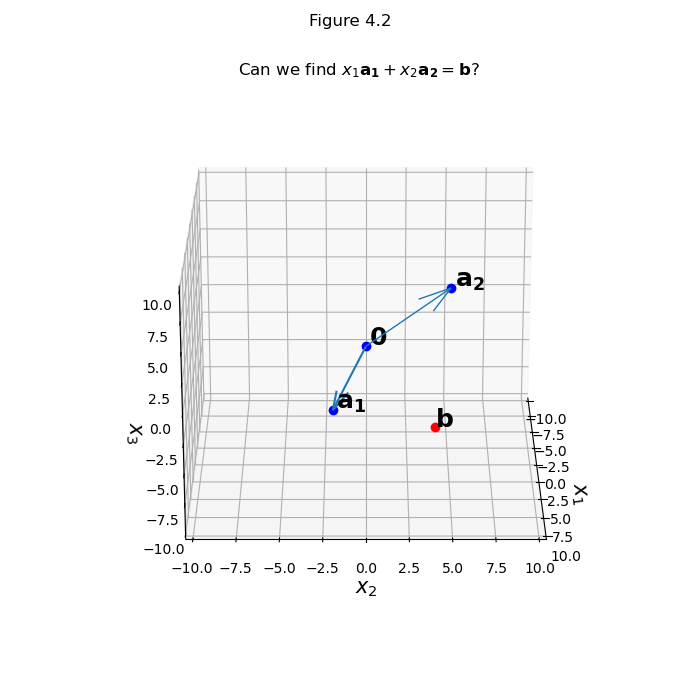

__Solution.__ We are going to convert from a __single__ vector equation to a __set__ of linear equations, that is, a __linear system.__

We start by writing the form of the solution, if it exists:

$$ x_1{\bf a_1} + x_2{\bf a_2} = {\bf b}.$$

Written out, this is:

$$ x_1 \left[\begin{array}{c}1\\-2\\-5\end{array}\right]+ x_2\left[\begin{array}{c}2\\5\\6\end{array}\right] = \left[\begin{array}{c}7\\4\\-3\end{array}\right].$$

By the definition of scalar-vector multiplication, this is:

$$\left[\begin{array}{c}x_1\\-2x_1\\-5x_1\end{array}\right]+ \left[\begin{array}{c}2x_2\\5x_2\\6x_2\end{array}\right]= \left[\begin{array}{c}7\\4\\-3\end{array}\right].$$

By the definition of vector addition, this is:

$$\left[\begin{array}{r}x_1 + 2x_2\\-2x_1 + 5x_2\\-5x_1+6x_2\end{array}\right] = \left[\begin{array}{c}7\\4\\-3\end{array}\right].$$

By the definition of vector equality, this is:

$$\begin{array}{rcl}x_1 + 2x_2&=&7\\-2x_1 + 5x_2&=&4\\-5x_1+6x_2&=&-3\end{array}.$$

We know how to solve this!  Firing up Gaussian Elimination, we first construct the augmented matrix of this system, and then find its reduced row echelon form:

$$\left[\begin{array}{rrr}1&2&7\\-2&5&4\\-5&6&-3\end{array}\right] \sim \left[\begin{array}{rrr}1&2&7\\0&9&18\\0&16&32\end{array}\right] \sim \left[\begin{array}{rrr}1&2&7\\0&1&2\\0&16&32\end{array}\right] \sim \left[\begin{array}{rrr}1&0&3\\0&1&2\\0&0&0\end{array}\right]$$

Voila!

Now, reading off the answer, we have $x_1 = 3$, $x_2 = 2$.  So we have found the solution to our original problem:

$$ 3 \left[\begin{array}{c}1\\-2\\-5\end{array}\right]+ 2\left[\begin{array}{c}2\\5\\6\end{array}\right] = \left[\begin{array}{c}7\\4\\-3\end{array}\right].$$

In other words, we have found that

$$ 3{\bf a_1} + 2{\bf a_2} = {\bf b}.$$

### A Vector Equation is  a Linear System!

Let's state this formally.   First, of all, recalling that vectors are columns, we can write the augmented matrix for the linear system in a very simple way.

For the vector equation  

$$x_1{\bf a_1} + x_2{\bf a_2} = {\bf b},$$ 

the corresponding linear system has augmented matrix:

$$[{\bf a_1}\;{\bf a_2}\;{\bf b}].$$

Then we can make the following statement:
    
A vector equation

$$ x_1{\bf a_1} + x_2{\bf a_2} + ... + x_n{\bf a_n} = {\bf b} $$

has the same solution set as the linear system whose augmented matrix is

$$ [{\bf a_1} \; {\bf a_2} \; ... \; {\bf a_n} \; {\bf b}].$$

This is a powerful concept; we have related 

* a single equation involving _columns_ 
* to a set of equations corresponding to _rows_.

### Span 

If a vector equation is equivalent to a linear system, then it must be possible for a vector equation to be inconsistent as well.

How can we understand what it means -- in terms of _vectors_ -- for a vector equation to be inconsistent?

The answer involves a new concept: the __span__ of a set of vectors.

Let's say we are given vectors ${\bf a_1}, {\bf a_2},$ and ${\bf b}$.  

And, say we know that it is possible to express $\mathbf{b}$ as a linear combination of $\mathbf{a}_1$ and $\mathbf{a}_2$.

That is, there are some $x_1, x_2$ such that $x_1{\bf a_1} + x_2{\bf a_2} = {\bf b}.$ 

Then we say that ${\bf b}$ is in the __Span__ of the set of vectors $\{{\bf a_1}, {\bf a_2}\}.$

More generally, let's say we are given a set of vectors ${\bf v_1, ..., v_p}$ where each ${\bf v_i} \in \mathbb{R}^n.$  

Then the set of all linear combinations of ${\bf v_1, ..., v_p}$ is denoted by 

$$ \mbox{Span}\{{\bf v_1, ..., v_p}\}$$ 

and is called the __subset of $\mathbb{R}^n$ spanned by ${\bf v_1, ..., v_p}.$__

**Span of a single vector in** $\mathbb{R}^3$
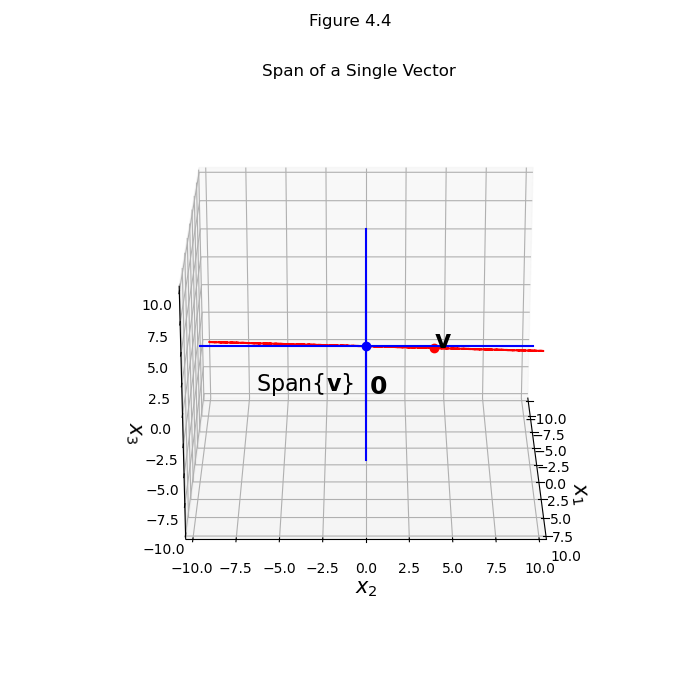

**Span of two vectors in** $\mathbb{R}^3$ 
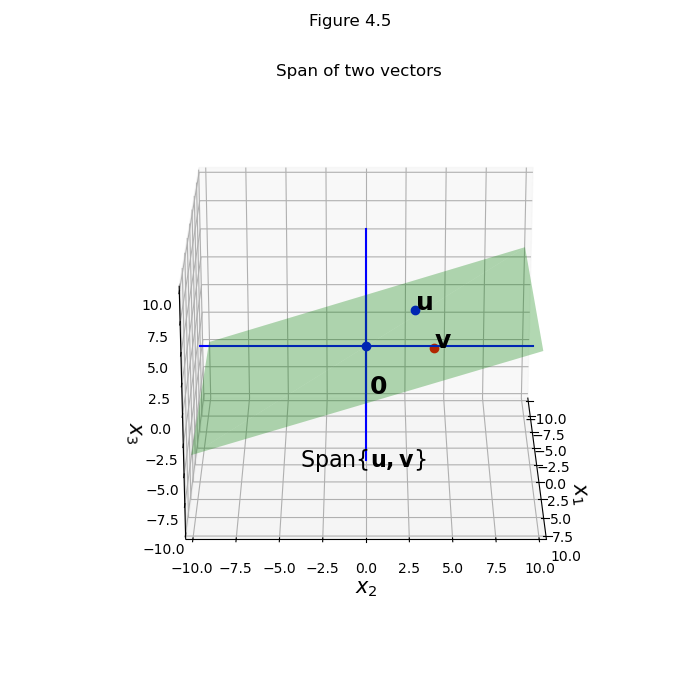

### Asking whether a vector lies within a Span

Asking whether a vector ${\bf b}$ is in Span$\{{\bf v_1, ..., v_p}\}$ is the same as asking whether the vector equation

$$x_1{\bf v_1} + x_2{\bf v_2} + \dots + x_p{\bf v_p} = {\bf b}$$ 

has a solution.

... which we now know is the same as asking whether the linear system with augmented matrix

$$ [{\bf v_1} \; {\bf v_2} \; ... \; {\bf v_p} \; {\bf b}]$$
has a solution.

Let ${\bf a_1} = \left[\begin{array}{c}1\\-2\\3\end{array}\right], {\bf a_2} = \left[\begin{array}{c}5\\-13\\-3\end{array}\right],$ and ${\bf b} = \left[\begin{array}{c}6\\8\\-5\end{array}\right]$.

Then Span{$\bf a_1, a_2$} is a plane through the origin in $\mathbb{R}^3$. Is $\bf b$ in that plane?

__Solution:__  Does the equation $x_1{\bf a_1} + x_2{\bf a_2} = \bf b$ have a solution?  

To answer this, consider the equivalent linear system.  Solve the system by row reducing the augmented matrix 

$$[{\bf a_1} \; {\bf a_2} \; {\bf b}]:$$

$$\left[\begin{array}{rrr}1&5&6\\-2&-13&8\\3&-3&-5\end{array}\right] \sim \left[\begin{array}{rrr}1&5&6\\0&-3&20\\0&-18&-23\end{array}\right] \sim \left[\begin{array}{rrr}1&5&6\\0&-3&20\\0&0&-143\end{array}\right]$$

The third row shows that the system has no solution.  

This means that the vector equation $x_1{\bf a_1} + x_2{\bf a_2} = \bf b$ has no solution.  

So ${\bf b}$ is _not_ in Span{$\bf a_1, a_2$}.

What does this situation look like geometrically?

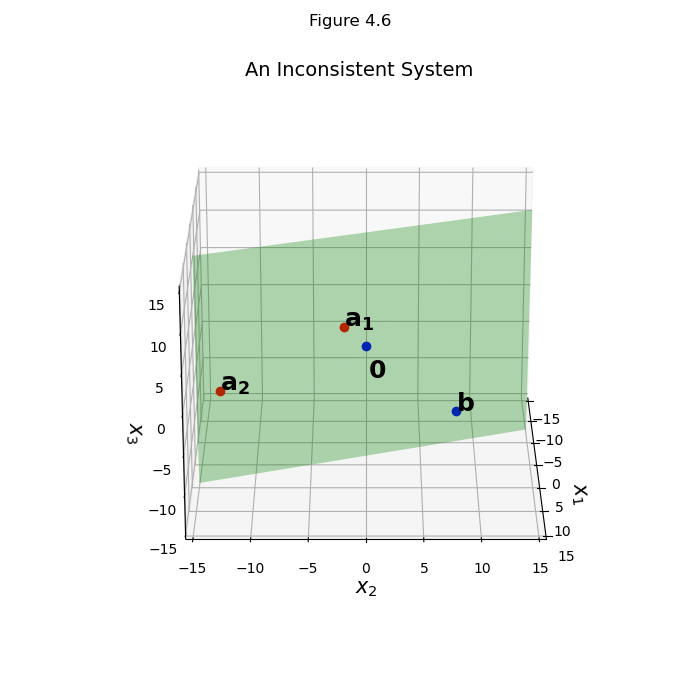

### Two Distinct Vector Spaces
Be sure to keep clear in your mind that we have been working with two different vector spaces.   

One vector space is for visualizing equations that correspond to rows.   

The other vector space is for visualizing vector equations (involving columns).

These are two different ways of visualizing the same linear system.

Let's look at an inconsistent system both ways:

Here are the views, first as a vector equation, and then as a system of equations.

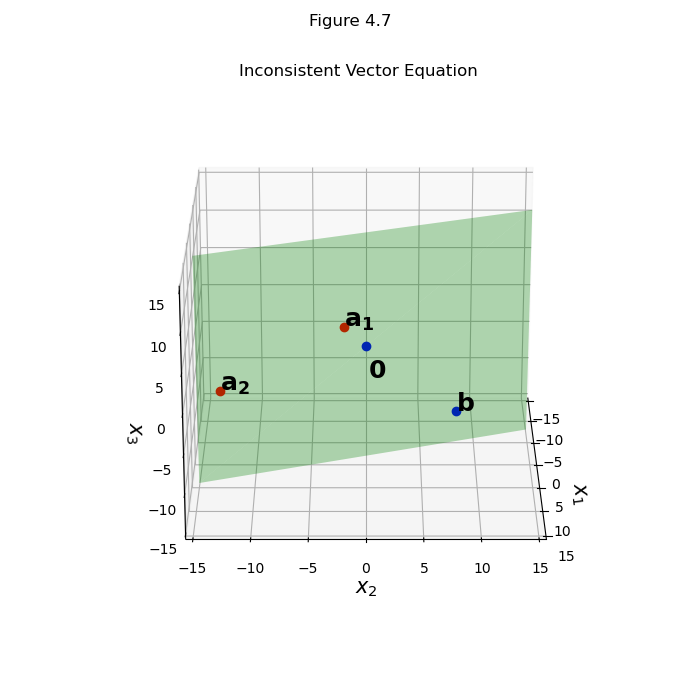

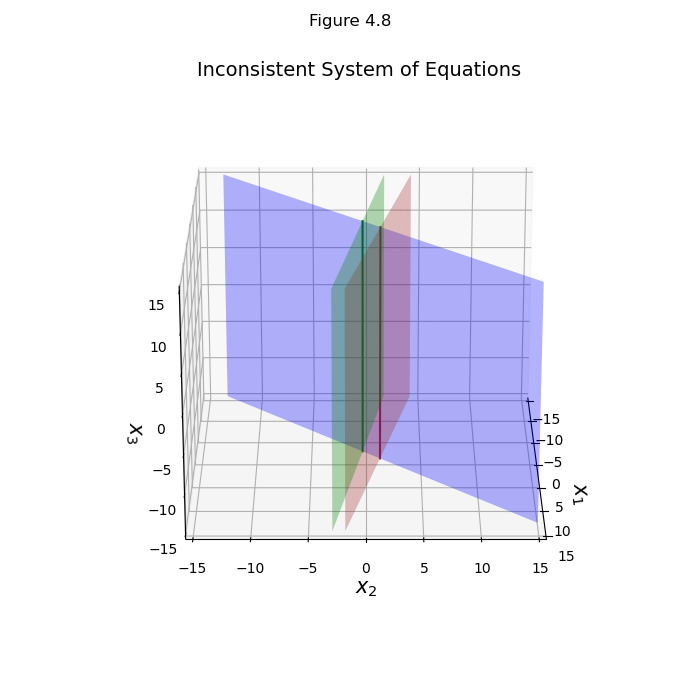

The second vector space (and visualization) is more familiar to us right now.   

However, as the course goes on we will use the first vector space -- the one in which columns are vectors -- much more often.   Make sure you understand the figure!

## 9.2 Lesson: Linear Dependence of Vectors
### Linear Dependence of Vectors
This lesson introduces the concept of linear dependence for vectors. This concept of dependence for vectors is fairly different from the concept of dependence with random variables. Linear dependence between vectors is a form of redundancy and will be seen to limit the ranks of matrices and vector spaces later. Those in turn can be interpreted as information bottlenecks in machine learning, making linear dependence a crucial notion.

### Definitions
**Definition: linear combinations of vectors**
A vector **v** is a linear combination of vectors $v_0, v_1,\dots, v_{n-1}$ if and only if there exists a set of coefficients $a_0, a_1, \dots, a_{n-1}$ such that 
$$
v = \sum_{i}a_iv_i
$$

**Definition: linear dependence**
a set of vectors $v_0, v_1,\dots, v_{n-1}$ is linearly dependant if the all zeros vector is a linear combination of $v_0, v_1,\dots, v_{n-1}$ with at least one non-zero coefficient.

If one of the vectors $v_0, v_1,\dots, v_{n-1}$ is the all zeros vector, they are allways depedent regardles o fthe other vectors. 

**Definition: linear independence**
A set of vectors is considered linearly independent if they are not linearly dependent.
A set of $n$ vectors of dimension $d$ must be linearly depdendent if $n>d$.

### Key Terms
- vector: a mathematical object containing an ordered and fixed list of numbers
- magnitude of a vector: a vector measure generalizing length
- unit vector: a vector of magnitude one
- dot product: a measure taking in two vectors of the same length and summing up their pairwise products

### Knowledge Check 1
What is the magnitude of the following vector? 
$$
\begin{bmatrix}
1\\
3\\
2\\
3\\
1\\
1
\end{bmatrix}
$$

In [12]:
import numpy as np
vector = np.array([[1], [3], [2], [3], [1], [1]])
magnitude = np.linalg.norm(vector)
magnitude

5.0

## Topic 2: Vector Similarity Measures
### Topic Overview
Once data is represented as vectors, a natural question is: How can we compare them? Since the data is all numbers now, can't they be compared quantitatively? Some of the more common vector similarity measures will be presented along with links to their usage in data science and machine learning.

### Learning Objectives
- Recognize common vector similarity measures
- Calculate common vector similarity measures
### Think About It
- How well can generic similarity measures work with generic data?

### 9.4 Lesson: Dot Products
**Definition: vector dot product**
The product of a two vectors **a** and **b** of the same length, denoted **a** $\cdot$ **b** is defined as follows:
$$
a \cdot b = \sum_ia_ib_i
$$
This formula multiplies the two vectors element-wise and returns the sum of those products.

In principle, you could calculate this with an expression like `(a * b).sum()` with the NumPy library. This would calculate the element-wise product vector and then calculate the sum from the product vector. In practice, the product vector would not be created since it would be immediately destroyed. The NumPy library has a `dot()` function instead, which is more efficient.

### Geometric Calculation of Dot Products
An alternative way to define the dot product is based on the geometry interpreting the vectors as position

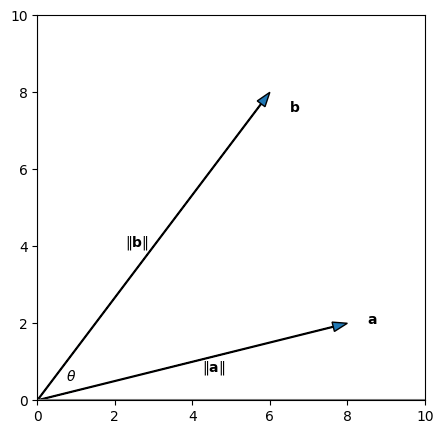
*Figure 1:  An illustration of two vectors with the components of the geometric calculation of the dot product marked*

If $\mathcal{O}$ denotes the origin vector of all zeros, $\angle a \mathcal{O} b$ denotes the angle between the rays $\overrightarrow{\mathcal{O} a}$ and $\overrightarrow{\mathcal{O} b}$, and $\theta = m \angle a \mathcal{O} b$ is the measure of that angle, then

$\mathbf{a} \cdot \mathbf{b} = \|\mathbf{a}\| \|\mathbf{b}\| \cos \theta$

**Dot Products in Other Linear Algebra Formulas**

Dot products implicitly show up in a number of other linear algebra operatiojns. here are a couple of examples.

**Example: dot products in linear functions**

Linear functions and linear models take the form
$$
f(x) = \sum^{n-1}_{j=0}a_jx_j+b
$$
Similarly, linear equations take the form
$$
\sum^{n-1}_{j=0}a_jx_j = b
$$

In both cases, the summation can be replaced by a dot product, respectively

$$
f(x)= a \cdot x + b
$$

or 
$$
a \cdot x = b
$$

in both cases, the additive constant $b$ can be replaced with zero if $x$ has a column fixed to 1.

**Example: dot products in matrix multiplication**

Matrix Multiplication was previously defined as
$$
(AB)_{ij} = \sum^{n-1}_{k=0}A_{i,k}B_{kj}
$$

With dot products, this can be rewritten as

$$
(AB)_{ij} = [A_{i,0}, \dots, A_{i,n-1}] \cdot [B_{0j},\dots,B_{n-1j}]
$$

Computing Angles With Dot Products

You can easily compute the angle between two vectors from the geometric formula for the dot product.

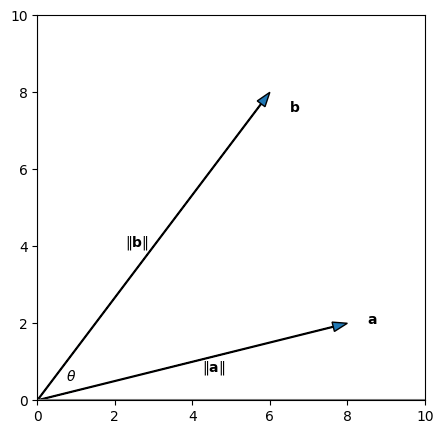

$a \cdot b = \|\mathbf{a}\|\|\mathbf{b}\|\cos\theta$

$\frac{a \cdot b}{|\mathbf{a}\|\|\mathbf{b}\|} = \cos\theta$

$\theta = \cos^{-1} \left( \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|} \right)$

Division gives you the cosine of the angle, which you can use to invert to get the angle.

**Projecting Vectors With Dot Products**

In physics and engineering, it is a useful operation to project one vector onto another.

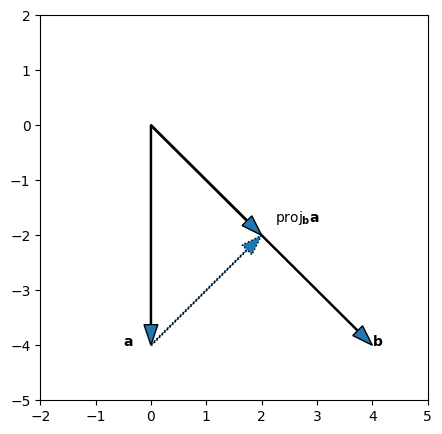

In this example, we are looking at the force of gravity and splitting it into vectors parallel and perpendicular with the surface. The parallel vector can be computed using the dot product, and then subtracting the parallel vector from the original vector gives the perpendicular vector. The parallel vector accelerates the object down the slope, while the perpendicular vector increases friction.

**Definition: projecting vectors**
The projection of vector $a$ onto vector $b$ is a vector denoted $\text{proj}_b a$ such that
$$
\text{proj}_{\mathbf{b}} \, \mathbf{a} = \|\mathbf{a}\| \cos \theta \, \frac{\mathbf{b}}{\|\mathbf{b}\|}
$$

This may be calculated as

$$
\text{proj}_{\mathbf{b}} \, \mathbf{a} = \frac{\mathbf{a} \cdot \mathbf{b}}{\mathbf{b} \cdot \mathbf{b}} \, \mathbf{b}
$$

If $\mathbf{b}$ is a unit vector, that simplifies to $(\mathbf{a} \cdot \mathbf{b}) \, \mathbf{b}$.

Next week, we will cover a more general notion of projection using matrices.

### 9.5 Lesson: Cosine Similarity
**Definition: cosine similarity**

If $\mathcal{O}$ denotes the origin vector of all zeros, $\angle a \mathcal{O} b$ denotes the angle between the rays $\overrightarrow{\mathcal{O} a}$ and $\overrightarrow{\mathcal{O} b}$, and $\theta = m \angle a \mathcal{O} b$ is the measure of that angle, then the cosine similarity of $a$ and $b$ is $\cos \theta$.

The cosine similarity of $a$ and $b$ may be computed with the expression

$$
\cos \theta = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|}
$$

This follows from the geometric identity

$$
\mathbf{a} \cdot \mathbf{b} = \|\mathbf{a}\| \|\mathbf{b}\| \cos \theta
$$

Cosine similarity does not have a standard terminology, but $\text{cos\_sim}(a, b)$ is somewhat common.

#### Applications of Cosine Similarity
Cosine similarity has many applications in machine learning, so it supports data science in many ways. We have not discussed these applications yet or their necessary concepts, but they will be listed briefly now.

- **Document similarity**. Cosine similarity is used as a measure of document similarity in information retrieval. Usually it is applied to variations of word frequency statistics between a query and each document.
- **Clustering**. Cosine similarity, or the closely related cosine distance, can be used as a criteria for clustering documents or general items.
- **Contrastive learning**. The representation learning technique contrastive learning uses cosine similarity for the loss function, encouraging high cosine similarity for matching pairs and low (negative) cosine similarity for dissimilar (or random) pairs.

### 9.6 Lesson: Orthogonality
#### Definitions of Orthogonality
#### Definition: orthogonal vectors

A pair of vectors is orthogonal if and only if their dot product is zero. A set of vectors is orthogonal if and only if each pair of vectors within the set is orthogonal.

Orthogonality is degenerate if some of the vectors are zero vectors (all zeros). The definition will deem any vector orthogonal to a zero vector, but something is likely wrong for most applications.

Assuming no zero vectors are present, then the geometric formula implies that the cosine of the angle between any pair of vectors is 0. In classical geometry, we would say they are perpendicular.

#### Definition: orthonormal vectors

A set of vectors is orthonormal if they are orthogonal and all of them have magnitude one.

The principal components of principal component analysis are orthonormal vectors. Both orthogonal and orthonormal vectors will be convenient when describing vector spaces later.

#### Applications of Orthogonality
Orthogonal vectors simplify many calculations and aid reasoning about vector spaces, but we have not covered these yet, so they will be listed briefly now.

Orthogonal vectors can be used for coordinate transforms. Principal components analysis is an example of this. If the vectors are also orthonormal, the transform preserves distances and angles.
Many least squares optimizations can be described using orthogonal vectors.
The vector spaces that we will cover later in this module are often most conveniently described with orthogonal vectors.
#### Key Terms
- **cosine similarity**: a vector similarity measure equivalent to measuring the angle between the vectors and calculating the cosine of that angle
- **orthogonal vectors**: vectors that are pairwise perpendicular, or have cosine similarity zero
- **orthonormal vectors**: a set of unit vectors that are also orthogonal vectors

### Knowledge Check 2
What is the dot product of the following vectors? $\begin{bmatrix}0.5\\2\end{bmatrix}\begin{bmatrix}3\\0.2\end{bmatrix}$

In [14]:
v1 = np.array([[0.5], [2]])
v2 = np.array([[3], [0.2]])

result = v1.flatten().dot(v2.flatten())
print(result)  # Output: 1.6

1.9


In [15]:
answer = (0.5 * 3) + (2 * 0.2)
answer

1.9

What is the cosine similarity of the following vectors? Note: for fractions, use two decimal places.

$$
\begin{bmatrix}
0.5\\
\sqrt{2}
\end{bmatrix}
\begin{bmatrix}
6\\
0
\end{bmatrix}
$$

In [18]:
import numpy as np

# Define the vectors
v1 = np.array([[0.5], [np.sqrt(2)]])
v2 = np.array([[6], [0]])

# Flatten the vectors to ensure they are treated as 1D arrays
v1_flat = v1.flatten()
v2_flat = v2.flatten()

# Calculate the dot product
dot_product = np.dot(v1_flat, v2_flat)

# Calculate the magnitudes (norms) of each vector
norm_v1 = np.linalg.norm(v1_flat)
norm_v2 = np.linalg.norm(v2_flat)

# Calculate the cosine similarity
cosine_similarity = dot_product / (norm_v1 * norm_v2)

print("Cosine Similarity:", cosine_similarity)

Cosine Similarity: 0.33333333333333326


Which of the following are properties of a set of orthonormal vectors?